# Make Box and Wisker Plots for ML Efficacy Metrics Display in Experiment I

In [26]:
import sys
import os
# Tricks for loading data and libraries from parent directories. 
parent = os.path.abspath("..")
sys.path.insert(1, parent)
print(sys.path)

import pandas as pd

# Custom styles and sizing for matplotlib.
import matplotlib.pyplot as plt
plt.style.use("tex.mplstyle")
from plotting_utils import set_size



['/home/ajo/gitRepos/master_thesis/plotting', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos/master_thesis', '/home/ajo/anaconda3/envs/master/lib/python38.zip', '/home/ajo/anaconda3/envs/master/lib/python3.8', '/home/ajo/anaconda3/envs/master/lib/python3.8/lib-dynload', '', '/home/ajo/.local/lib/python3.8/site-packages', '/home/ajo/anaconda3/envs/master/lib/python3.8/site-packages']


In [27]:
data_code = "AD"
if data_code == "AD":
    df = pd.read_csv("../ML_efficacy_catBoost_AD.csv") 
    columns_include_F1 = ["F1_real", "F1_tabddpm_joint" ,"F1_tabddpm", "F1_tvae", "F1_mcce"]
    columns_include_AUC = ["AUC_real", "AUC_tabddpm_joint" ,"AUC_tabddpm", "AUC_tvae", "AUC_mcce"]
    columns_include_acc = ["acc_real", "acc_tabddpm_joint" ,"acc_tabddpm", "acc_tvae", "acc_mcce"]
    ticklabels = [r"\textit{Real}", "TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
    ticklables_AUC = ticklabels
elif data_code == "CH":
    df = pd.read_csv("../ML_efficacy_catBoost_CH.csv") 
    columns_include_F1 = ["F1_real", "F1_tabddpm_joint", "F1_tvae", "F1_mcce"] # Don't inlude Conditional modelling.
    columns_include_AUC = ["AUC_real", "AUC_tabddpm_joint", "AUC_tabddpm", "AUC_tvae", "AUC_mcce"]
    columns_include_acc = ["acc_real", "acc_tabddpm_joint", "acc_tvae", "acc_mcce"]# Don't inlude Conditional modelling.
    ticklabels = [r"\textit{Real}", "TabDiffJoint", "TVAE", "MCCE"]
    ticklables_AUC = [r"\textit{Real}", "TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
elif data_code == "DI":
    df = pd.read_csv("../ML_efficacy_catBoost_DI.csv")
    columns_include_F1 = ["F1_real", "F1_tabddpm_joint" ,"F1_tabddpm", "F1_tvae", "F1_mcce"]
    columns_include_AUC = ["AUC_real", "AUC_tabddpm_joint" ,"AUC_tabddpm", "AUC_tvae", "AUC_mcce"]
    columns_include_acc = ["acc_real", "acc_tabddpm_joint" ,"acc_tabddpm", "acc_tvae", "acc_mcce"]
    ticklabels = [r"\textit{Real}", "TabDiffJoint", "TabDiffCond", "TVAE", "MCCE"]
    ticklables_AUC = ticklabels

print(df)

   seed   F1_real  F1_tabddpm  F1_tabddpm_joint   F1_mcce   F1_tvae  AUC_real  \
0  1234  0.846154    0.641026          0.806202  0.830189  0.762887  0.816154   
1  4500  0.846154    0.597403          0.762712  0.830189  0.803922  0.809231   
2  2018  0.826923    0.526316          0.796875  0.811321  0.767677  0.813846   
3  1999  0.826923    0.526316          0.806202  0.826923  0.826923  0.820769   
4  2023  0.838095    0.564103          0.752294  0.838095  0.783505  0.816154   

   AUC_tabddpm  AUC_tabddpm_joint  AUC_mcce  AUC_tvae  acc_real  acc_tabddpm  \
0     0.746923           0.571538  0.804615  0.806154  0.792208     0.636364   
1     0.783077           0.619231  0.798462  0.799231  0.792208     0.597403   
2     0.765385           0.713077  0.800000  0.805385  0.766234     0.532468   
3     0.725385           0.679231  0.800000  0.812308  0.766234     0.532468   
4     0.719231           0.644615  0.802308  0.800000  0.779221     0.558442   

   acc_tabddpm_joint  acc_mcce  

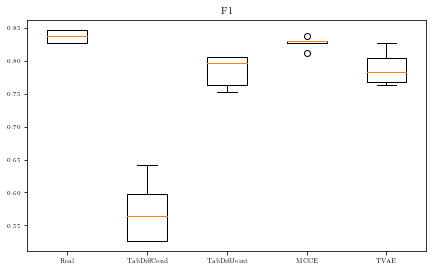

In [28]:
# Make boxplot for F1
fig, axes = plt.subplots(1,1, figsize = set_size(subplots = (1,1)))
axes.boxplot(df.iloc[:,1:6], vert = True)
#axes.set_ylim([0,1])
axes.xaxis.set_ticklabels(["Real", "TabDiffCond", "TabDiffJoint", "MCCE", "TVAE"])
axes.title.set_text("F1")
plt.show()

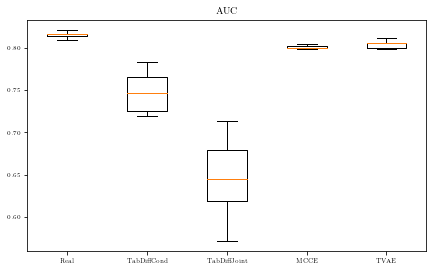

In [29]:
# Make boxplot for AUC
fig, axes = plt.subplots(1,1, figsize = set_size(subplots = (1,1)))
axes.boxplot(df.iloc[:,6:11], vert = True, whis = 1000)
axes.xaxis.set_ticklabels(["Real", "TabDiffCond", "TabDiffJoint", "MCCE", "TVAE"])
axes.title.set_text("AUC")
plt.show()

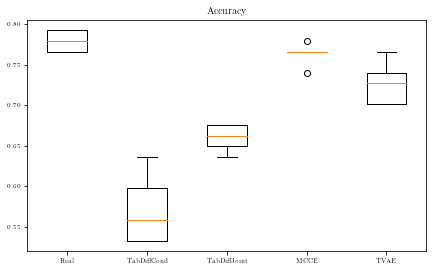

In [30]:
# Make boxplot for Accuracy
fig, axes = plt.subplots(1,1, figsize = set_size(subplots = (1,1)))
axes.boxplot(df.iloc[:,11:], vert = True, whis = 100000)
axes.xaxis.set_ticklabels(["Real", "TabDiffCond", "TabDiffJoint", "MCCE", "TVAE"])
axes.title.set_text("Accuracy")
plt.show()

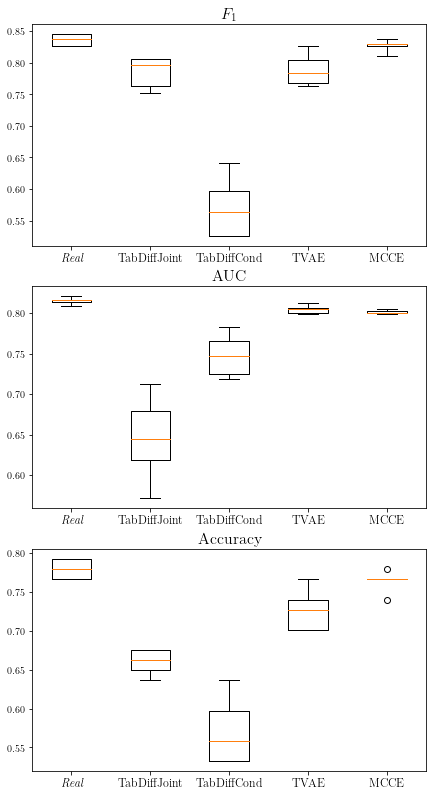

In [31]:
# ALL at once
import matplotlib as mpl
# Change some of the parameters manually here, to make plots slightly more visible in master.
mpl.rcParams["axes.titlesize"] = 16
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 10
fig, axes = plt.subplots(3,1, figsize = set_size(subplots = (3,1)))

# We set "whis" to an unreasonably large value to force the whiskers to show the min and max values.
axes[0].boxplot(df.loc[:,columns_include_F1], vert = True, whis = 100000)
axes[0].xaxis.set_ticklabels(ticklabels)
axes[0].title.set_text(r"$F_1$")

axes[1].boxplot(df.loc[:,columns_include_AUC], vert = True, whis = 100000)
axes[1].xaxis.set_ticklabels(ticklables_AUC)
axes[1].title.set_text("AUC")

axes[2].boxplot(df.loc[:, columns_include_acc], vert = True, whis = 100000000)
axes[2].xaxis.set_ticklabels(ticklabels)
axes[2].title.set_text("Accuracy")
plt.savefig("../plots/box_and_whisker_ML_efficacy_"+data_code+".pdf", format="pdf", bbox_inches = "tight")

In [32]:
print(df)

   seed   F1_real  F1_tabddpm  F1_tabddpm_joint   F1_mcce   F1_tvae  AUC_real  \
0  1234  0.846154    0.641026          0.806202  0.830189  0.762887  0.816154   
1  4500  0.846154    0.597403          0.762712  0.830189  0.803922  0.809231   
2  2018  0.826923    0.526316          0.796875  0.811321  0.767677  0.813846   
3  1999  0.826923    0.526316          0.806202  0.826923  0.826923  0.820769   
4  2023  0.838095    0.564103          0.752294  0.838095  0.783505  0.816154   

   AUC_tabddpm  AUC_tabddpm_joint  AUC_mcce  AUC_tvae  acc_real  acc_tabddpm  \
0     0.746923           0.571538  0.804615  0.806154  0.792208     0.636364   
1     0.783077           0.619231  0.798462  0.799231  0.792208     0.597403   
2     0.765385           0.713077  0.800000  0.805385  0.766234     0.532468   
3     0.725385           0.679231  0.800000  0.812308  0.766234     0.532468   
4     0.719231           0.644615  0.802308  0.800000  0.779221     0.558442   

   acc_tabddpm_joint  acc_mcce  